<a href="https://colab.research.google.com/github/DenA054/Data-Viz-for-Stanford-Course/blob/main/CS06_DataViz_Denis_Azarov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data and package import

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install opendatasets --upgrade

import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents?datasetId=199387&searchQuery=regression'
od.download(dataset_url)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Skipping, found downloaded files in "./us-accidents" (use force=True to force download)


In [ ]:
df_org=pd.read_csv('/content/us-accidents/US_Accidents_Dec21_updated.csv')

# Exploration of the full dataset

In [ ]:
#filter the data to exclude years of COVID-19
df_org = df_org[df_org['Start_Time'].str.startswith(('2016','2017','2018','2019'))]

<function matplotlib.pyplot.show(close=None, block=None)>

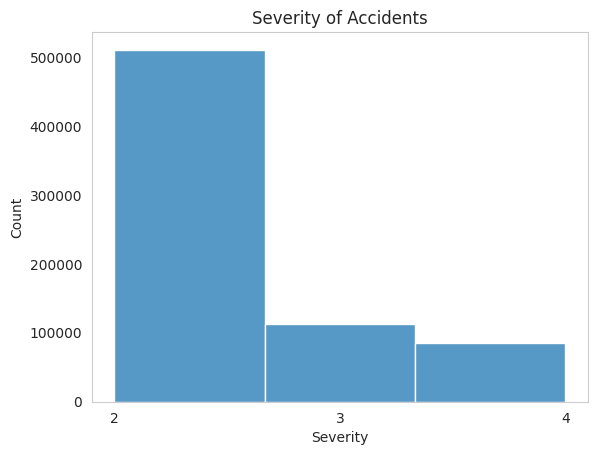

In [ ]:
# Plot the histogram with a binwidth of 1
# Set the x-axis to display only integer values
sns.set_style("whitegrid", {'axes.grid' : False})
plt.xticks(range(int(df_org['Severity'].min()), int(df_org['Severity'].max())+1))
sns.histplot(x='Severity', kde=False, data=df_org, bins=3)
plt.title('Severity of Accidents')
plt.show

In [ ]:
df_org['Start_Time'] = pd.to_datetime(df_org['Start_Time'])
df_org['month'] = df_org['Start_Time'].dt.month

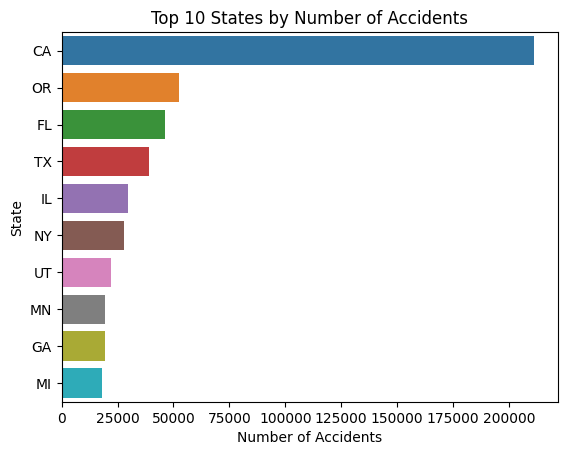

In [ ]:
df_states = df_org.groupby('State')['ID'].count()
top_10_states = df_states.sort_values(ascending=False).head(10)
sns.barplot(x=top_10_states.values, y=top_10_states.index, orient='h')
plt.xlabel('Number of Accidents')
plt.ylabel('State')
plt.title('Top 10 States by Number of Accidents')
plt.show()

In [ ]:
top_10_states = df_org.groupby('State')['ID'].count().sort_values(ascending=False).head(10).index.tolist()
top_10_states

['CA', 'OR', 'FL', 'TX', 'IL', 'NY', 'UT', 'MN', 'GA', 'MI']

In [ ]:
df_pivot = df_org.pivot_table(index='Visibility(mi)', columns='State', values='Severity', aggfunc='mean')

In [ ]:
df_pivot_top_10=df_pivot[top_10_states]

In [ ]:
df_pivot_top_10

State                 CA        OR        FL        TX        IL        NY  \
Visibility(mi)                                                               
0.00            2.021277  2.066667  2.545455  2.833333  2.000000  3.666667   
0.06            2.000000  2.000000       NaN       NaN       NaN       NaN   
0.10            2.263158  2.105263  2.300000  2.285714  2.400000  2.534884   
0.12            2.000000  2.000000  2.000000  3.500000  2.000000  2.000000   
0.20            2.301653  2.081752  2.480519  2.765152  2.435294  2.670213   
...                  ...       ...       ...       ...       ...       ...   
90.00           2.000000       NaN       NaN       NaN       NaN       NaN   
110.00               NaN       NaN       NaN       NaN       NaN       NaN   
111.00               NaN       NaN       NaN  3.000000       NaN       NaN   
130.00               NaN       NaN       NaN       NaN       NaN       NaN   
140.00          2.000000       NaN       NaN       NaN       NaN       NaN   

State                 UT        MN        GA        MI  
Visibility(mi)                                          
0.00            2.000000  2.400000  2.000000  4.000000  
0.06                 NaN       NaN       NaN       NaN  
0.10            2.000000  2.000000  2.700000  3.428571  
0.12            2.025641       NaN       NaN       NaN  
0.20            2.183673  2.132075  3.037975  2.803738  
...                  ...       ...       ...       ...  
90.00                NaN       NaN       NaN       NaN  
110.00               NaN       NaN       NaN       NaN  
111.00               NaN       NaN       NaN       NaN  
130.00               NaN       NaN       NaN       NaN  
140.00               NaN       NaN       NaN       NaN  

[66 rows x 10 columns]

Text(0.5, 0, 'State')

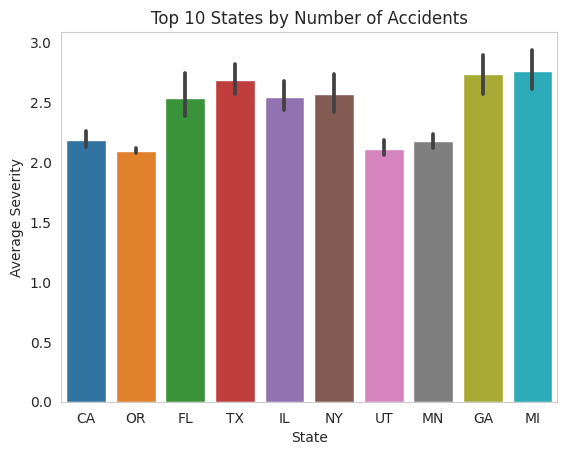

In [ ]:
sns.barplot(data=df_pivot_top_10)
plt.title('Top 10 States by Number of Accidents')
plt.ylabel('Average Severity')
plt.xlabel('State')

In [ ]:
df_org['hour'] = df_org['Start_Time'].dt.hour

Text(0.5, 1.0, 'Frequency of Accidents over Daytime')

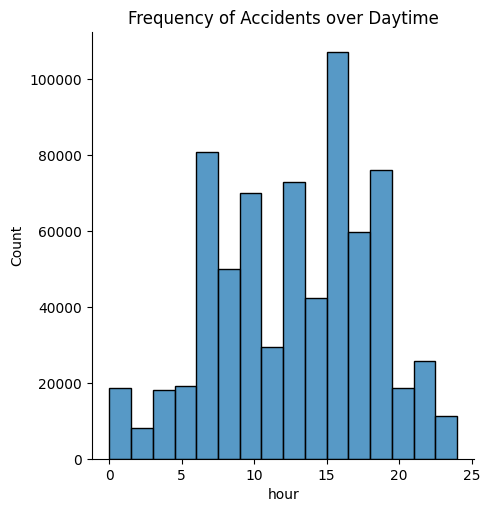

In [ ]:
sns.displot(x='hour', kde=False, data=df_org, binwidth=1.5)
plt.title('Frequency of Accidents over Daytime')

In [ ]:
df_pivot2 = df_org.pivot_table(index='hour', columns='Severity', values='ID', aggfunc='count')

Text(0.5, 1.0, 'Severity of Accidents over Daytime')

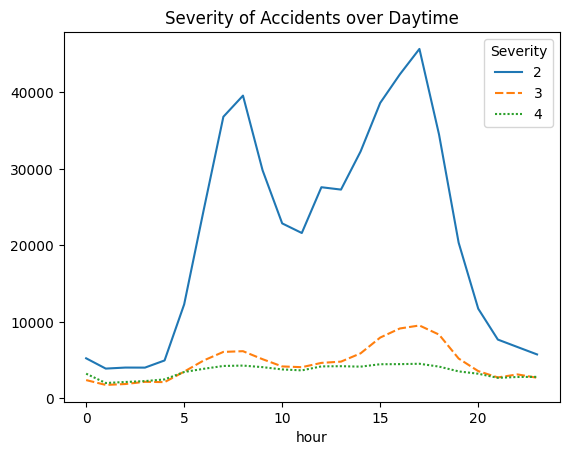

In [ ]:
sns.lineplot(data=df_pivot2)
plt.title('Severity of Accidents over Daytime')

In [ ]:
df_weather = df_org.groupby('Weather_Condition')[['ID']].count()
df_weather_20 = df_weather.sort_values('ID',ascending=False).head(20)
df_weather_20

ID
Weather_Condition           
Fair                   59530
Clear                  55664
Partly Cloudy          21425
Mostly Cloudy          18887
Overcast               12555
Cloudy                 11485
Scattered Clouds        7302
Haze                    6179
Light Rain              6162
Rain                    2309
Fog                     1635
Heavy Rain               975
Fair / Windy             700
Smoke                    558
Partly Cloudy / Windy    160
Light Snow               116
Mostly Cloudy / Windy    106
Snow                      82
Mist                      78
Drizzle                   73

Text(0.5, 1.0, 'Weather Conditions during Recorded Accidents')

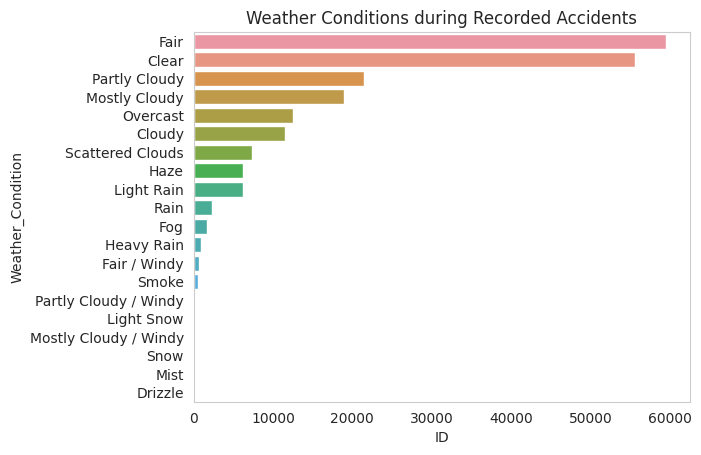

In [ ]:
sns.barplot(x='ID', y=df_weather_20.index, data=df_weather_20, orient='h')
plt.title('Weather Conditions during Recorded Accidents')

# GEO


In [ ]:
df_SF=df_org[df_org['City']=='San Francisco']

In [ ]:
data_for_map = df_SF[['Start_Lat', 'Start_Lng']].values
data_for_map

array([[  37.74508 , -122.40493 ],
       [  37.769009, -122.405144],
       [  37.80791 , -122.3674  ],
       ...,
       [  37.77848 , -122.40061 ],
       [  37.80811 , -122.36719 ],
       [  37.733491, -122.412121]])

In [ ]:
import folium
from folium import plugins

In [ ]:
m.add_child(plugins.HeatMap(data_for_map))
m.save("HeatMap_SF.html")
m

In [ ]:
df_SF_2019 = df_SF[df_SF['Start_Time'].dt.year == 2019]

In [ ]:
# convert Start_Time column to datetime
df_SF_2019['Start_Time'] = pd.to_datetime(df_SF_2019['Start_Time'])

# create a new column for the month
df_SF_2019['Month'] = df_SF_2019['Start_Time'].dt.month

months= sorted(df_SF_2019['Month'].unique())

data = {}
for month in months:
    coords = []
    accidents = df_SF_2019[df_SF_2019['Month'] == month]
    for _, row in accidents.iterrows():
        coords.append([row['Start_Lat'], row['Start_Lng']])
    data[month] = coords

# create the map
m3 = folium.Map([37.78664017, -122.48212433], zoom_start=12)

m3.add_child(plugins.HeatMapWithTime(data))

m3.save("HeatMap_SF_w_Time.html")

m3


<ipython-input-291-056a4dabe32f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SF_2019['Start_Time'] = pd.to_datetime(df_SF_2019['Start_Time'])
<ipython-input-291-056a4dabe32f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SF_2019['Month'] = df_SF_2019['Start_Time'].dt.month


In [ ]:
df_LA=df_org[df_org['City']=='Los Angeles']
df_LA = df_LA[df_LA['Start_Time'].dt.year == 2019]

In [ ]:
# convert Start_Time column to datetime
df_LA['Start_Time'] = pd.to_datetime(df_LA['Start_Time'])

# create a new column for the month
df_LA['Month'] = df_LA['Start_Time'].dt.month

months= sorted(df_LA['Month'].unique())

data = {}
for month in months:
    coords = []
    accidents = df_LA[df_LA['Month'] == month]
    for _, row in accidents.iterrows():
        coords.append([row['Start_Lat'], row['Start_Lng']])
    data[month] = coords

# create the map
m4 = folium.Map([34.052235, -118.243683], zoom_start=10)

m4.add_child(plugins.HeatMapWithTime(data))

m4.save("HeatMap_LA_w_Time.html")

m4